<a href="https://colab.research.google.com/github/kdstheace/Study_Python_MachineLearning/blob/main/%5BReview%5D0406Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **손글씨 분류**
-MNIST 데이터 분류 : 숫자 10개 중 하나를 맞추기 초간단 딥러닝

-지도학습: label(y값)을 제공해준다.

In [2]:
import tensorflow
print(tensorflow.__version__)

2.4.1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import to_categorical #원핫인코딩함수. 아니면 pandas의 getdummies써도 됨.
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
#3D니까 1차원으로 바꾸는 Flatten필요

In [34]:
#이미지의 폭과 높이를 변수에 담기
width = 28
height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data() #튜플로 가져옴 
#GAN > 딥페이크에 사용함. 지도학습의 분류작업할 떄 많이 사용.

In [35]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
y_train[0]

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


5

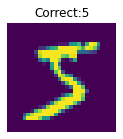

In [37]:
#샘플1개 출력해보기
plt.imshow(x_train[0])
plt.title('Correct:'+ str(y_train[0]))
plt.rcParams['figure.figsize'] = (2,2)
plt.axis('off')
plt.show()

In [38]:
#데이터 스케일링.standard scaler안쓰고 직접 255로 나눠서 스케일링해보자
x_train = x_train.reshape(60000, width, height, 1).astype('float32')/255.0 #1은 채널로 흑백,   칼라일경우 grb 3
x_test = x_test.reshape(10000, width, height, 1).astype('float32')/255.0
x_train[0]

#원핫 인코딩
print(y_train[0])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Covolutional > Relu > Pooling
Convolutional : filter로 하나씩 대보고 갯수세기 그래서 한칸(stride)만큼 옆으로
Pooling: 최댓값

In [39]:
#모델생성하기
model = Sequential()
#1) CNN
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))#pooling 특징추출

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))#pooling
#2) 딥러닝
model.add(Flatten()) #1차원으로 펴기
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [40]:
#학습하기
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(x_train, y_train, epochs = 30, batch_size = 32, validation_data=(x_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 40s 4ms/step - loss: 1.1276 - accuracy: 0.6344 - val_loss: 0.1061 - val_accuracy: 0.9659
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0973 - accuracy: 0.9702 - val_loss: 0.0630 - val_accuracy: 0.9814
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0628 - accuracy: 0.9801 - val_loss: 0.0485 - val_accuracy: 0.9856
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.0517 - val_accuracy: 0.9840
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.0452 - val_accuracy: 0.9860
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.0373 - val_accuracy: 0.9893
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.0419 - val_accuracy

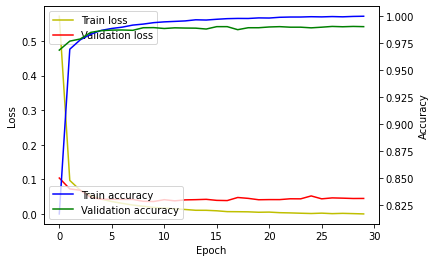

In [ ]:
#학습과정 그래프로 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='Train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='Validation loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='Train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='Validation accuracy')

#그래프에 Label설정
loss_ax.set_xlabel('Epoch')
loss_ax.set_ylabel('Loss')
acc_ax.set_ylabel('Accuracy')

#Legend
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [46]:
yhat = model.predict(x_test)
print(np.argmax(yhat[0]))
print(np.argmax(y_test[0]))

7
7


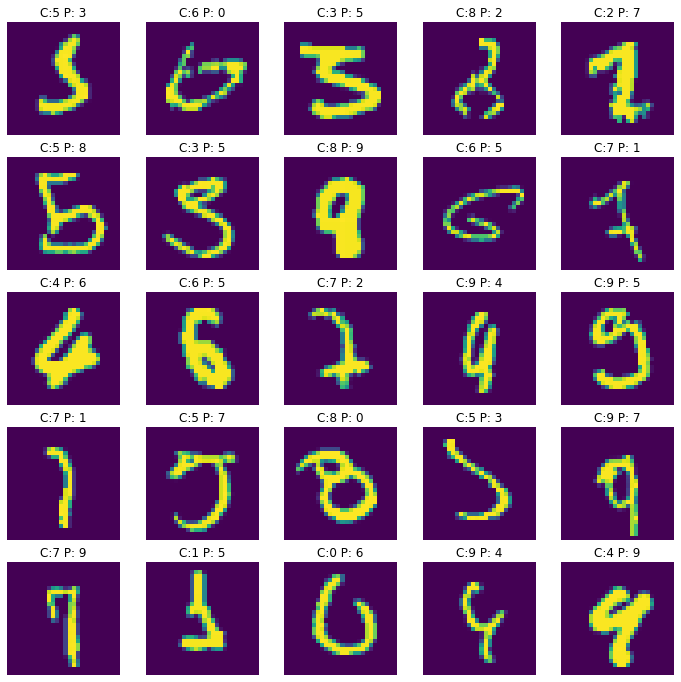

In [52]:
plt.rcParams['figure.figsize'] = (12,12)
row = 5
col = 5

fig, axes = plt.subplots(row, col)
cnt = 0
i = 0
while cnt < (row*col):
  if np.argmax(yhat[i]) == np.argmax(y_test[i]):
    i+=1
    continue
  sub_plot = axes[int(cnt/row), int(cnt%row)]
  sub_plot.axis('off')

  sub_plot.imshow(x_test[i].reshape(width, height))
  title = 'C:' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat[i]))
  sub_plot.set_title(title)

  i+=1
  cnt+=1